### Load Python modules

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests 
import datetime as dt
import scipy.linalg as sp
import requests
import io
from ggplot import *
from io import StringIO

## Problem 1
In this problem we will be using a gene expression data set obtained from a microarray experiement Read more about the specific experiment here. There are two data sets we will use:

The gene expression intensities where the rows represent the features on the microarray (e.g. genes) and the columsns represent the different microarray samples.

A table that contains the information about each of the samples (columns in the gene expression data set) such as the sex, the age, the treatment status, the date the samples were processed. Each row represents one sample.

### Problem 1(a)
Read in the two files from Github: exprs_GSE5859.csv and sampleinfo_GSE5859.csv as pandas DataFrames called exprs and sampleinfo. Use the gene names as the index of the exprs DataFrame.

In [2]:


In [111]:
url="https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv"
Gene_Exp=pd.read_csv(url,index_col=0)
Gene_Exp
Gene_Exp.dtypes

GSM25581.CEL.gz     float64
GSM25681.CEL.gz     float64
GSM136524.CEL.gz    float64
GSM136707.CEL.gz    float64
GSM25553.CEL.gz     float64
GSM136676.CEL.gz    float64
GSM136711.CEL.gz    float64
GSM136542.CEL.gz    float64
GSM136535.CEL.gz    float64
GSM25399.CEL.gz     float64
GSM25552.CEL.gz     float64
GSM25542.CEL.gz     float64
GSM136544.CEL.gz    float64
GSM25662.CEL.gz     float64
GSM136563.CEL.gz    float64
GSM48663.CEL.gz     float64
GSM136547.CEL.gz    float64
GSM136710.CEL.gz    float64
GSM25660.CEL.gz     float64
GSM136557.CEL.gz    float64
GSM136669.CEL.gz    float64
GSM25551.CEL.gz     float64
GSM136530.CEL.gz    float64
GSM25482.CEL.gz     float64
GSM25569.CEL.gz     float64
GSM25658.CEL.gz     float64
GSM25356.CEL.gz     float64
GSM25657.CEL.gz     float64
GSM136570.CEL.gz    float64
GSM25628.CEL.gz     float64
                     ...   
GSM136537.CEL.gz    float64
GSM25526.CEL.gz     float64
GSM25377.CEL.gz     float64
GSM136574.CEL.gz    float64
GSM136713.CEL.gz    

In [112]:
url = "https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv"
Gene_SampleInfo = pd.read_csv(url)
Gene_SampleInfo
Gene_SampleInfo.dtypes

ethnicity    object
date         object
filename     object
sex          object
dtype: object

Make sure the order of the columns in the gene expression DataFrame match the order of file names in the sample annotation DataFrame. If the order of the columns the exprs DataFrame do not match the order of the file names in the sampleinfo DataFrame, reorder the columns in the exprs DataFrame.

Note: The column names of the gene expression DataFrame are the filenames of the orignal files from which these data were obtained.

Hint: The method list.index(x) [read here] can be used to return the index in the list of the first item whose value is x. It is an error if there is no such item. To check if the order of the columns in exprs matches the order of the rows in sampleinfo, you can check using the method .all() on a Boolean or list of Booleans:

Example code: (exprs.columns == sampleinfo.filename).all()

In [114]:
exp=pd.DataFrame()
a=list(Gene_SampleInfo.filename)
for i in range(len(Gene_SampleInfo.filename)):
    exp[[a[i]]]=Gene_Exp[[a[i]]]
exp

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149
1294_at,7.410882,7.557979,7.299338,7.085593,7.591942,7.441150,7.421111,7.746847,7.509109,7.602446,...,7.315589,7.433595,7.436915,7.362233,7.013634,7.560389,7.449893,6.966849,7.018479,7.371051
1316_at,4.297712,4.183178,4.262169,4.339762,4.122669,4.059433,4.418636,4.129058,4.382991,4.226268,...,4.298108,4.258052,4.171531,4.353395,4.132773,4.390128,4.159143,4.114151,4.117132,4.127533
1320_at,3.628234,3.632977,3.697666,3.792282,3.506593,3.468308,3.560444,3.813061,3.803830,3.513758,...,4.051465,3.773762,3.743677,3.958070,3.913909,3.789926,3.685936,3.646175,3.751869,3.633665
1431_at,2.770336,2.792908,2.613063,2.644105,2.754759,2.497562,2.829319,2.882762,2.831340,2.635422,...,2.971514,2.807619,2.802329,2.949889,2.897670,2.884918,2.760064,2.760788,2.824156,2.564087
1438_at,5.421081,5.152743,4.966595,5.314540,4.924525,5.042933,5.184165,5.263484,5.299795,4.809927,...,5.509684,5.245941,5.096722,5.358912,5.278286,5.333707,5.198846,5.212348,5.187526,5.149863


In [115]:
(exp.columns==Gene_SampleInfo.filename).all()

True

Show the head of the two tables: exprs and sampleinfo.

In [23]:
exp.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149


In [30]:
Gene_SampleInfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


### Problem 1(b)
Extract the year and month as integers from the sampleinfo table.

Hint: To convert a Series or a column of a pandas DataFrame that contains a date-like object, you can use the to_datetime function [read here]. This will create a DatetimeIndex which can be used to extract the month and year for each row in the DataFrame.

In [116]:
Gene_SampleInfo['Year']=pd.DatetimeIndex(Gene_SampleInfo['date']).year
Gene_SampleInfo['Month']=pd.DatetimeIndex(Gene_SampleInfo['date']).month

### Problem 1(c)
Convert the dates in the date column from the sampleinfo table into days since October 31, 2002. Add a column to the sampleinfo DataFrame titled elapsedInDays containing the days since October 31, 2002. Show the head of the sampleinfo DataFrame which includes the new column.

Hint: Use the datetime module to create a new datetime object for the specific date October 31, 2002. Then, subtract the October 31, 2002 date from each date from the date column in the sampleinfo DataFrame.

In [117]:
a=pd.to_datetime('20021031', format='%Y%m%d')
Gene_SampleInfo['date']=pd.to_datetime(Gene_SampleInfo['date'])

In [118]:
Gene_SampleInfo['days']=Gene_SampleInfo['date']-a

### Problem 1(d)
Use exploratory analysis and the singular value decomposition (SVD) of the gene expression data matrix to determine if the date the samples were processed has large effect on the variability seen in the data or if it is just ethnicity (which is confounded with date).

Hint: See the end of the lecture from 9/23/2014 for help with SVD.

First subset the the sampleinfo DataFrame to include only the CEU ethnicity. Call this new subsetted DataFrame sampleinfoCEU. Show the head of sampleinfoCEU DataFrame.

In [119]:
sampleinfoCEU=Gene_SampleInfo[Gene_SampleInfo.ethnicity=='CEU']
sampleinfoCEU.head()

,ethnicity,date,filename,sex,Year,Month,days
0,CEU,2003-02-04,GSM25349.CEL.gz,M,2003,2,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,2003,2,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,2002,12,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,2003,1,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,2003,1,64 days


Next, subset the exprs DataFrame to only include the samples with the CEU ethnicity. Name this new subsetted DataFrame exprsCEU. Show the head of the exprsCEU DataFrame.

In [120]:
expceu=exp[sampleinfoCEU.filename]
expceu

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123
1294_at,7.410882,7.557979,7.299338,7.085593,7.591942,7.441150,7.421111,7.746847,7.509109,7.602446,...,7.914786,7.173199,7.665905,7.563670,7.373392,7.478840,7.559692,7.449893,6.966849,7.018479
1316_at,4.297712,4.183178,4.262169,4.339762,4.122669,4.059433,4.418636,4.129058,4.382991,4.226268,...,4.118060,4.141118,4.150407,4.317541,4.285874,4.175848,4.112733,4.159143,4.114151,4.117132
1320_at,3.628234,3.632977,3.697666,3.792282,3.506593,3.468308,3.560444,3.813061,3.803830,3.513758,...,3.686914,3.725652,3.749646,3.715990,3.624856,3.552681,3.620363,3.685936,3.646175,3.751869
1431_at,2.770336,2.792908,2.613063,2.644105,2.754759,2.497562,2.829319,2.882762,2.831340,2.635422,...,2.822806,2.837083,2.954752,2.862769,2.966377,2.777286,2.661332,2.760064,2.760788,2.824156
1438_at,5.421081,5.152743,4.966595,5.314540,4.924525,5.042933,5.184165,5.263484,5.299795,4.809927,...,5.290304,5.272286,5.419614,5.097509,5.460409,4.980462,4.982561,5.198846,5.212348,5.187526


In [121]:
(expceu.columns==sampleinfoCEU.filename).all()

True

In [122]:
normalized_ceu=expceu-expceu.mean()
normalized_ceu.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
1007_s_at,0.889683,0.504320,0.239911,0.414682,0.375837,0.318789,0.330471,0.313837,0.601632,0.630257,...,0.781012,0.849726,0.880097,1.157170,0.289480,0.753281,0.567560,0.744457,1.075995,0.393314
1053_at,1.201854,1.072552,1.353745,1.691891,1.556928,1.405819,1.030815,1.086277,1.113548,1.639870,...,1.346188,1.678328,0.669769,1.376355,1.429403,1.368994,1.474277,1.773287,1.467110,1.541026
117_at,-0.623760,-0.671391,-0.323016,-0.464036,-0.373386,-0.658521,-0.404006,-0.266358,1.064970,0.754757,...,-0.119984,-0.475697,-0.107469,-0.768077,-0.415942,0.120354,-0.064300,-0.496932,-0.496247,-0.337878
121_at,2.096531,2.035195,1.763980,1.925362,1.831122,1.350273,1.373079,1.204215,1.865310,1.660514,...,1.717037,2.006276,1.678063,2.033623,2.309914,1.976719,1.771157,1.587741,1.623616,1.867707
1255_g_at,-2.585061,-2.633739,-2.675285,-2.576041,-2.607479,-2.498112,-2.605663,-2.705035,-2.320436,-2.840106,...,-2.710515,-2.557171,-2.538480,-2.553329,-2.541810,-2.407224,-2.248017,-2.568276,-2.628394,-2.514631


In [123]:
u,s,v=sp.svd(normalized_ceu)

In [156]:
a=pd.DataFrame(v.T[:,0])
a.columns=['PrincipalComponent1']


Create a histogram using the values from PC1. Use a bin size of 25.

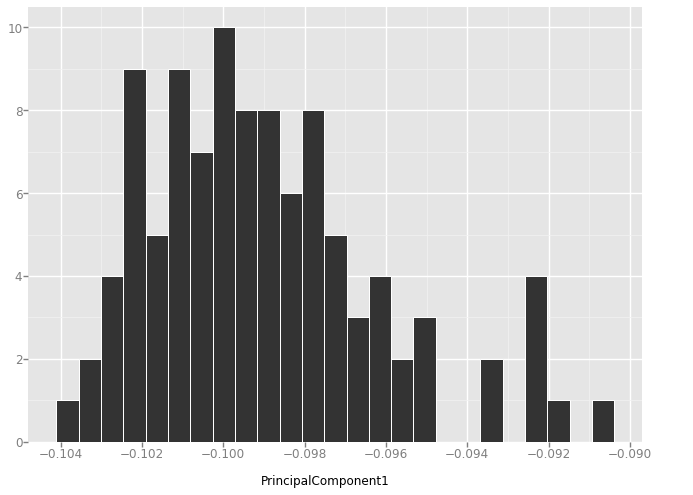

<ggplot: (85564481081)>

In [125]:
ggplot(a,aes(x='PrincipalComponent1'))+geom_histogram(bins=25,color='white')

In [158]:
b=sampleinfoCEU.days.astype('timedelta64[D]')
b[b.notnull()].astype(int)
Final_Data=pd.DataFrame({'days':b,'Component1':a.PrincipalComponent1})
Final_Data.dtypes

Component1    float64
days          float64
dtype: object

Create a scatter plot with the days since October 31, 2002 on the x-axis and PC1 on the y-axis.

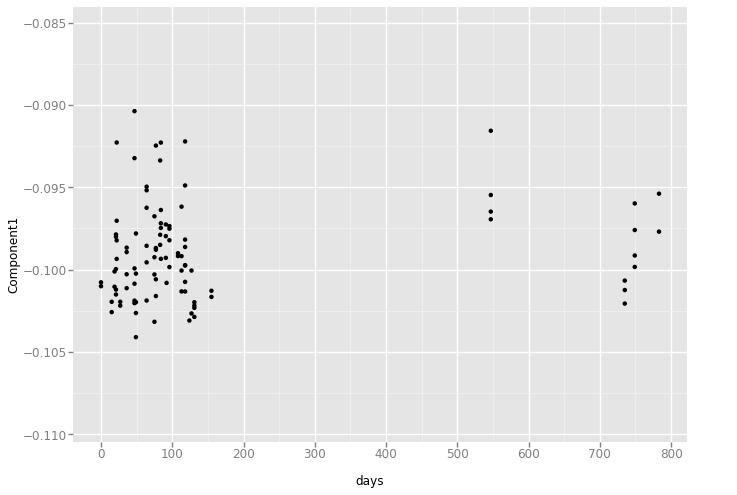

<ggplot: (85565212813)>

In [159]:
ggplot(Final_Data,aes(x='days',y='Component1'))+geom_point()

Around what day do you notice a difference in the way the samples were processed?

**Around day 150 we can see the number of samples that were processed reduced.**

### Problem 2: Is there a pollster bias in presidential election polls?


**Problem 2(a)**
The HuffPost Pollster contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the HuffPost Pollster API to access the data.

Read in the polls from the 2012 Presidential Election: Barack Obama vs Mitt Romney into a pandas DataFrame called election. For this problem, you may read in the polls for this race directly using the CSV file available from the HuffPost Pollster page.

In [25]:
w=pd.read_csv('C:/Users/Varnith/Desktop/2012-general-election-romney-vs-obama.csv')
w.dtypes

Pollster                   object
Start Date                 object
End Date                   object
Entry Date/Time (ET)       object
Number of Observations    float64
Population                 object
Mode                       object
Obama                     float64
Romney                    float64
Undecided                 float64
Other                     float64
Pollster URL               object
Source URL                 object
Partisan                   object
Affiliation                object
Question Text             float64
Question Iteration          int64
dtype: object

In [50]:
w['year']=pd.DatetimeIndex(w['Start Date']).year
w['month']=pd.DatetimeIndex(w['Start Date']).month
M=len(w[(w.month==11) & (w.year==2012)])
M

19

In [27]:
N=w['Number of Observations'].median()

### Problem 2(b)
Using the median sample size N from Problem 1(a), simulate the results from a single poll: simulate the number of votes for Obama out of a sample size N where p = 0.53 is the percent of voters who are voting for Obama.

Hint: Use the binomial distribution with parameters N and p = 0.53.

In [28]:
l=np.random.binomial(N,.53)

Now, perform a Monte Carlo simulation to obtain the estimated percentage of Obama votes with a sample size N where N is the median sample size calculated in Problem 2(a). Let pp=0.53 be the percent of voters are voting for Obama.

Hint: You will repeat the simulation above 1,000 times and plot the distribution of the estimated percent of Obama votes from a single poll. The results from the single poll you simulate is random variable and will be different every time you sample.

In [38]:
np.random.binomial(N,.53,1000)/N

array([ 0.54 ,  0.535,  0.52 ,  0.521,  0.548,  0.543,  0.524,  0.533,
        0.541,  0.522,  0.514,  0.556,  0.568,  0.516,  0.503,  0.516,
        0.516,  0.546,  0.522,  0.545,  0.527,  0.514,  0.532,  0.532,
        0.512,  0.537,  0.529,  0.528,  0.529,  0.54 ,  0.521,  0.524,
        0.533,  0.512,  0.537,  0.51 ,  0.522,  0.527,  0.514,  0.54 ,
        0.518,  0.537,  0.526,  0.525,  0.54 ,  0.531,  0.552,  0.523,
        0.533,  0.532,  0.528,  0.503,  0.524,  0.508,  0.53 ,  0.508,
        0.521,  0.498,  0.552,  0.52 ,  0.567,  0.53 ,  0.535,  0.529,
        0.517,  0.527,  0.55 ,  0.534,  0.561,  0.521,  0.54 ,  0.523,
        0.54 ,  0.517,  0.527,  0.533,  0.552,  0.538,  0.544,  0.536,
        0.537,  0.502,  0.503,  0.535,  0.514,  0.496,  0.532,  0.545,
        0.522,  0.557,  0.53 ,  0.547,  0.53 ,  0.539,  0.551,  0.512,
        0.54 ,  0.585,  0.542,  0.503,  0.545,  0.532,  0.515,  0.553,
        0.545,  0.52 ,  0.528,  0.56 ,  0.537,  0.543,  0.512,  0.531,
      

In [51]:
np.mean(np.random.binomial(N,.53,1000)/N)

0.53037900000000004

In [58]:
runs= 1000
sample=[]
k=0
for r in range(0,runs):
    x=np.mean(np.random.binomial(N,.53,1)/N);
    sample.append(x)
    
sample

[0.54600000000000004,
 0.53700000000000003,
 0.53900000000000003,
 0.53600000000000003,
 0.55600000000000005,
 0.52700000000000002,
 0.56499999999999995,
 0.52600000000000002,
 0.497,
 0.52700000000000002,
 0.55500000000000005,
 0.54800000000000004,
 0.50800000000000001,
 0.54000000000000004,
 0.50600000000000001,
 0.51800000000000002,
 0.51600000000000001,
 0.53500000000000003,
 0.55100000000000005,
 0.54800000000000004,
 0.51300000000000001,
 0.52000000000000002,
 0.54700000000000004,
 0.52300000000000002,
 0.53100000000000003,
 0.54100000000000004,
 0.52000000000000002,
 0.53700000000000003,
 0.52100000000000002,
 0.54000000000000004,
 0.52700000000000002,
 0.51900000000000002,
 0.50900000000000001,
 0.56699999999999995,
 0.52600000000000002,
 0.54000000000000004,
 0.54400000000000004,
 0.54300000000000004,
 0.52200000000000002,
 0.54700000000000004,
 0.54100000000000004,
 0.52800000000000002,
 0.52700000000000002,
 0.49299999999999999,
 0.52100000000000002,
 0.498,
 0.5450000000000

(array([   6.,   17.,   59.,  151.,  214.,  248.,  173.,   94.,   29.,    9.]),
 array([ 0.478 ,  0.4881,  0.4982,  0.5083,  0.5184,  0.5285,  0.5386,
         0.5487,  0.5588,  0.5689,  0.579 ]),
 <a list of 10 Patch objects>)

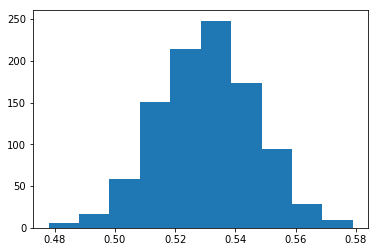

In [53]:
plt.hist(sample)

What is the standard error (SE) of the estimated percentage from the poll.

Hint: Remember the SE is the standard deviation (SD) of the distribution of a random variable.

In [47]:
np.std(sample)

15.91660488295164

### Problem 2(c)
Now suppose we run M polls where M is the number of polls that happened in November (calculated in Problem 2(a)). Run 1,000 simulations and compute the mean of the M polls for each simulation.

In [59]:
runs= 1000
sample1=[]
k=0
for r in range(0,runs):
    x=np.mean(np.random.binomial(N,.53,M)/N);
    sample1.append(x)
sample1


[0.53078947368421059,
 0.53121052631578958,
 0.52726315789473699,
 0.5293684210526316,
 0.52873684210526317,
 0.53063157894736845,
 0.52352631578947362,
 0.52642105263157912,
 0.52568421052631564,
 0.53021052631578958,
 0.53473684210526329,
 0.53236842105263171,
 0.52826315789473688,
 0.52926315789473699,
 0.53815789473684206,
 0.53342105263157891,
 0.52499999999999991,
 0.52994736842105272,
 0.53015789473684216,
 0.53747368421052633,
 0.53426315789473688,
 0.5304210526315789,
 0.53294736842105261,
 0.53257894736842115,
 0.52915789473684216,
 0.5338421052631579,
 0.52357894736842103,
 0.5343157894736843,
 0.52926315789473688,
 0.52873684210526317,
 0.5353684210526316,
 0.52915789473684205,
 0.53000000000000003,
 0.53042105263157902,
 0.52794736842105261,
 0.52952631578947373,
 0.52715789473684216,
 0.52773684210526317,
 0.54105263157894745,
 0.53621052631578947,
 0.53121052631578947,
 0.53042105263157902,
 0.52600000000000002,
 0.53173684210526329,
 0.52847368421052632,
 0.529684210526

What is the distribution of the across M polls standard deviation?

Hint: Show a plot.

(array([   7.,   22.,   87.,  157.,  230.,  262.,  154.,   60.,   15.,    6.]),
 array([ 0.51868421,  0.52101053,  0.52333684,  0.52566316,  0.52798947,
         0.53031579,  0.53264211,  0.53496842,  0.53729474,  0.53962105,
         0.54194737]),
 <a list of 10 Patch objects>)

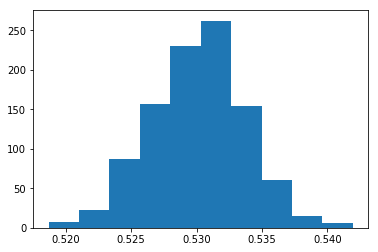

In [57]:
plt.hist(sample1)

 Is the SE of the average of polls larger, the same, or smaller than that the SD of a single poll (calculated in Problem 2(b))? By how much?

Hint: Compute a ratio of the two quantities.

In [60]:
np.std(sample1) / np.std(sample) 

0.23012468373455663

### Problem 2(d)
Repeat Problem 2(c) but now record the across poll standard deviation in each simulation.

In [61]:
runs= 1000
sample2=[]
k=0
for r in range(0,runs):
    x=np.std(np.random.binomial(N,.53,M)/N);
    sample2.append(x)
sample2

[0.017836437541031706,
 0.016450378671895478,
 0.016870535215242982,
 0.019328763748187355,
 0.011538926050739398,
 0.01419902068333064,
 0.015759620901834189,
 0.015297963943970629,
 0.017445760821389239,
 0.016536537234618121,
 0.01392162470220451,
 0.0099201800537676316,
 0.012910087533041889,
 0.016808189535374222,
 0.014015820107878069,
 0.014191800527630975,
 0.017927678657591508,
 0.01532871583290241,
 0.013772589100322283,
 0.013330031908908586,
 0.013821577734843904,
 0.01066383849856823,
 0.018570968914587975,
 0.013700799661236605,
 0.01372786558896935,
 0.014822495444126003,
 0.017168062857278576,
 0.015580903148928451,
 0.015187288751195481,
 0.01735406104930623,
 0.013973064710224534,
 0.015571477583306738,
 0.017604928798650114,
 0.017052794021318561,
 0.012474239383603565,
 0.010049737803390579,
 0.01464766249681152,
 0.020083758132387015,
 0.015616597463707986,
 0.015689331555351224,
 0.012931312252246379,
 0.020143804337453126,
 0.01472499523818405,
 0.014109975646413

What is the distribution of the across M polls standard deviation?

Hint: Show a plot.

(array([  34.,  117.,  253.,  270.,  191.,   93.,   27.,   13.,    1.,    1.]),
 array([ 0.00908013,  0.01086036,  0.01264059,  0.01442082,  0.01620105,
         0.01798128,  0.01976151,  0.02154174,  0.02332197,  0.0251022 ,
         0.02688243]),
 <a list of 10 Patch objects>)

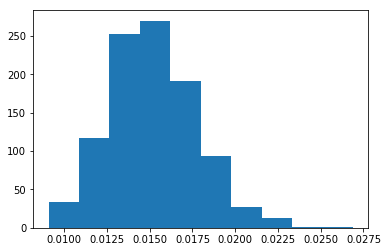

In [62]:
plt.hist(sample2)

### Problem 2(e)
What is the standard deviation of M polls in our real (not simulated) 2012 presidential election data ?

In [65]:
np.std(w)

Number of Observations    1619.830437
Obama                        2.419990
Romney                       2.903699
Undecided                    3.697375
Other                        2.686053
Question Text                     NaN
Question Iteration           0.000000
year                         0.666685
month                        3.062415
dtype: float64

### Problem 3:
Is the average of polls better than just one poll?

### Problem 3(a)
Most undecided voters vote for one of the two candidates at the election. Therefore, the reported percentages underestimate the final value of both candidates. However, if we assume the undecided will split evenly, then the observed difference should be an unbiased estimate of the final difference.

Add a new column to the election DataFrame containg the difference between Obama and Romeny called Diff.

In [73]:
w['Diff']=w['Obama']-w['Romney']
w

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,year,month,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,2012,11,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2012,11,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,2012,11,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,2012,11,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,2012,11,-1.0
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,2012,11,0.0
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1,2012,11,1.0
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,2012,11,2.0
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,2012,11,0.0
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,2012,11,2.0


### Problem 3(b)
Make a plot of the differences for the week before the election (e.g. 5 days) where the days are on the x-axis and the differences are on the y-axis. Add a horizontal line showing 3.9%: the difference between Obama and Romney on election day.

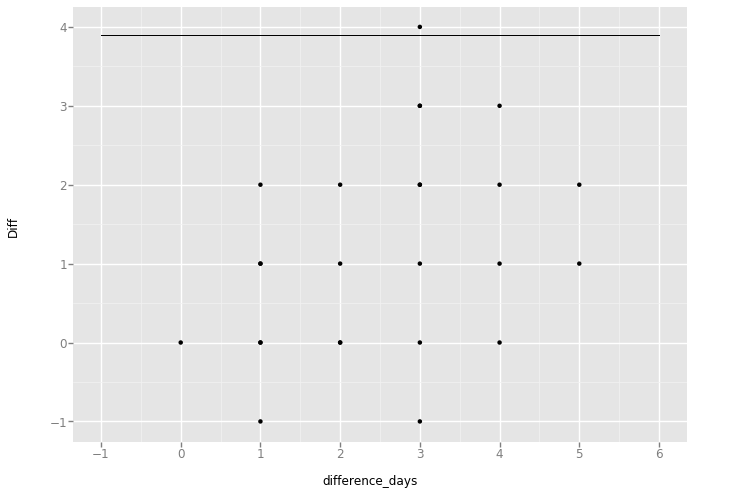

<ggplot: (-9223371853515377148)>

In [155]:
w['Max_Start_Date']='2012-11-04'
w['difference_days']=(pd.DatetimeIndex(w['Max_Start_Date'])-pd.DatetimeIndex(w['Start Date'])).days
a=w[w.difference_days<=5]
ggplot(a,aes('difference_days','Diff'))+geom_point()+geom_abline(intercept =3.9, slope = 0)

### Problem 3(c)
Make a plot showing the differences by pollster where the pollsters are on the x-axis and the differences on the y-axis.

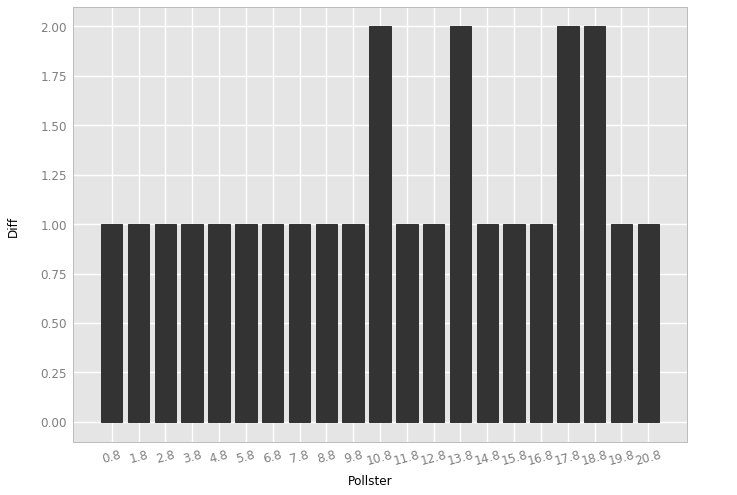

<ggplot: (183340910712)>

In [170]:
ggplot(a,aes('Pollster','Diff'))+geom_bar()+theme(axis_text_x = element_text(angle=15))

### Problem 3(d)
Take the average for each pollster and then compute the average of that. Given this difference how confident would you have been of an Obama victory?

Hint: Compute an estimate of the SE of this average based exclusively on the observed data.

In [174]:
np.mean(w.groupby(['Pollster']).mean().reset_index().Diff)
np.std(w.groupby(['Pollster']).mean().reset_index().Diff)

2.755479832292053

Very high standard deviation.Not confident at all of winning.

### Problem 3(e)
For AC209 Students: Show the difference against time and see if you can detect a trend towards the end. Use this trend to see if it improves the final estimate.

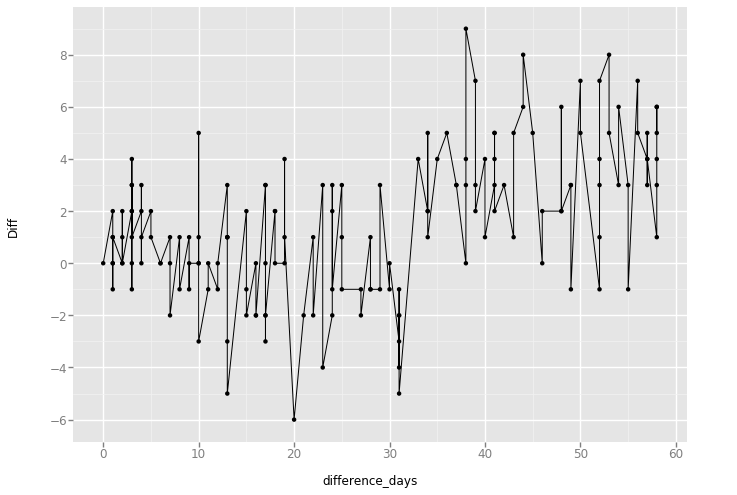

<ggplot: (-9223371853646448331)>

In [181]:
ggplot(w[w.difference_days<=60],aes('difference_days','Diff'))+geom_line()+geom_point()

### Problem 4
In this last problem, we will use the polls from the 2014 Senate Midterm Elections from the HuffPost Pollster API to create a preliminary prediction of the result of each state.

The HuffPost Pollster API allows you to access the data as a CSV or a JSON response by tacking ".csv" or ".json" at the end of the URLs. For example the 2012 Presidential Election could be accessed as a .json instead of a .csv

### Problem 4(a)
Read in the polls for all of the 2014 Senate Elections using the HuffPost API. For example, we can consider the 2014 Senate race in Kentucky between Mitch McConnell and Alison Grimes.

To search for the 2014 Senate races, use the topics parameter in the API [read more about topics here].

In [1]:
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"

In [3]:
election_urls = [election['url'] + '.csv' for election in requests.get(url_str).json()]
election_urls

['http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons.csv',
 'http://elections.huffingtonpost.com/pollster/2014-massachusetts-senate-herr-vs-markey.csv',
 'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed.csv',
 'http://elections.huffingtonpost.com/pollster/2014-montana-senate-daines-vs-curtis.csv',
 'http://elections.huffingtonpost.com/pollster/2014-oklahoma-senate-lankford-vs-johnson.csv',
 'http://elections.huffingtonpost.com/pollster/2014-hawaii-senate-cavasso-vs-schatz.csv',
 'http://elections.huffingtonpost.com/pollster/2014-kansas-senate-roberts-vs-orman-vs-taylor.csv',
 'http://elections.huffingtonpost.com/pollster/2014-wyoming-senate.csv',
 'http://elections.huffingtonpost.com/pollster/2014-tennessee-senate-alexander-vs-ball.csv',
 'http://elections.huffingtonpost.com/pollster/2014-idaho-senate-risch-vs-mitchell.csv',
 'http://elections.huffingtonpost.com/pollster/2014-new-jersey-senate-bell-vs-booker.csv',
 'ht

In [5]:
def build_frame(url):
    """
    Returns a pandas DataFrame object containing
    the data returned from the given url
    """
    source = requests.get(url).text
    
    # Use StringIO because pd.DataFrame.from_csv requires .read() method
    s = StringIO(source)
    
    return pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True)

In [8]:
dfs = dict((election.split("/")[-1][:-4], build_frame(election)) for election in election_urls)

C:\Users\Varnith\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Show the head of the DataFrame containing the polls for the 2014 Senate race in Kentucky between McConnell and Grimes

In [188]:
print(dfs.keys())
dfs['2014-kentucky-senate-mcconnell-vs-grimes'].head()

dict_keys(['2014-delaware-senate-wade-vs-coons', '2014-massachusetts-senate-herr-vs-markey', '2014-rhode-island-senate-zaccaria-vs-reed', '2014-montana-senate-daines-vs-curtis', '2014-oklahoma-senate-lankford-vs-johnson', '2014-hawaii-senate-cavasso-vs-schatz', '2014-kansas-senate-roberts-vs-orman-vs-taylor', '2014-wyoming-senate', '2014-tennessee-senate-alexander-vs-ball', '2014-idaho-senate-risch-vs-mitchell', '2014-new-jersey-senate-bell-vs-booker', '2014-new-mexico-senate-weh-vs-udall', '2014-oklahoma-senate-inhofe-vs-silverstein', '2014-south-carolina-senate-scott-vs-dickerson', '2014-south-carolina-senate-graham-vs-hutto', '2014-texas-senate-cornyn-vs-alameel', '2014-minnesota-senate-mcfadden-vs-franken', '2014-maine-senate-collins-vs-bellows', '2014-south-dakota-senate-rounds-vs-weiland', '2014-nebraska-senate-sasse-vs-domina', '2014-georgia-senate-perdue-vs-nunn', '2014-oregon-senate-wehby-vs-merkley', '2014-mississippi-senate-cochran-vs-childers', '2014-iowa-senate-ernst-vs-br

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Sponsor,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1


### Problem 4(b)
For each 2014 Senate race, create a preliminary prediction of the result for that state.

In [205]:
a=dfs['2014-kentucky-senate-mcconnell-vs-grimes']
len(a.index)

57

In [206]:
simulations = np.random.uniform(size=(len(a.index), 1000))

In [217]:
simulations<a.iloc[:,7].reshape(-1,1)


C:\Users\Varnith\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\Varnith\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)